<a href="https://colab.research.google.com/github/jkjh23/BusanAIDeveloperCourse_AI/blob/master/3_DeepLearning/13-4_%EA%B0%95%ED%99%94%ED%95%99%EC%8A%B5_%EA%B0%80%EC%B9%98%EB%B0%98%EB%B3%B5%EB%B2%95_sarsa_QLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 가치 반복법

- 가치를 중시하는 정책 갱신 방법
  - 정책 반복법(ex) 정책 경사법)은 1 에피소드 종료후(1 에피소드 단위로) 보상을 부여하고, 이를 기반으로 갱신을 수행
  - 가치 반복법은 행동 1회 단위로 파라미터를 갱신한다
    - 어떤 행동을 선택하면, 다음 상태 가치와 현재 상태 가치의 차이를 계산
    - 이 차이만큼 가치를 증가 시킨다

- 알고리즘
  - Sarsa (살사)
    - 수렴은 느림, 국소적인 해답에 갇히지 않는다(유연하다)
  - Q Learning(Q 학습)
    - 수령은 빠름, 국소적인 해답에 갇힐수 있다(쉽다)

# 강화학습 요소 설계

|강화 학습 요소|미로 게임|
|--:|:--|
|에이전트|미로속의 마우스|
|환경|미로|
|목적|0번위치에서 8번위치(골인지점)까지 최단거리로 이동|
|행동|상우하좌 이동, 4방향 존재|
|에피소드|8번위치에 도착하면, 미로를 탈출하면 종료됨|
|상태|에이전트의 위치|
|보상|골인하면 + 1|
|학습방법|Sarsa, Q학습|
|파라미터 변경 주기(정책 결정하는 측면)|1 행동 마다, Q함수를 갱신|

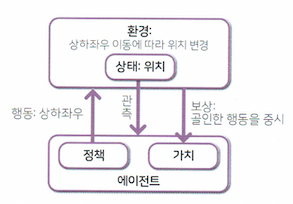

In [ ]:
from IPython.display import Image

Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic_rl/강화10.png')
# 정책 반복법

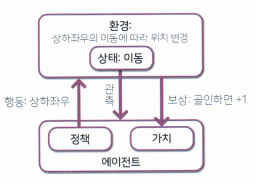

In [ ]:
# 가치 반복법 -> 보상값이 중요하다!
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic_rl/강화11.png')

# 수익, 할인 보상 

- 목표
  - 수익의 극대화
    - 즉시보상 + 지연보상(미래에 발생되는 보상)

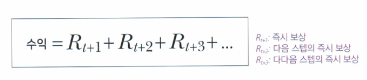

In [ ]:
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic_rl/강화12.png', width=600)
# 즉시 보상 + 다음 스텝의 즉시 보상 + 다다음 스텝의 즉시 보상 + ...

- 수익 계산 방법
  - 에이전트의 사고방식에 따라 수익을 계산하는 방법은 달라질 수 있다.
  - 예) 할인 보상 합계

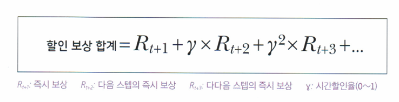

In [ ]:
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic_rl/강화13.png', width=600)
# 현재 시점에서 미래의 즉시 보상들은 그 보상값이 줄어들 수 있다.
# 줄어들 수 있다 => '할인'이라고 표현
# 미래의 보상을 할인한 보상을 합계한 것으로 가치로 계산

# 가치

- 수익
  - 아직 발생하지 않은, 미래에 발생 가능성이 있는 상황(일)을 포함하는, 일종의 확정되지 않은 값이다.
    - 에이전트는 상태와 정책을 고정한 후 조건부로 해당 수입을 계산할 수 있다.
      - 이런 수익을 우리는 가치라고 부른다.
        - 이런 가치를 가장 크게 얻을 수 있는 조건을 찾아내는 것 => 학습의 목표
- 방법
  - 행동가치함수
  - 상태가치함수

# 행동가치함수

- 특정한 상태에서 특정한 행동을 선택하는 가치를 계산하는 함수
- 기호는 Q 
- Q 함수

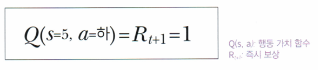

In [ ]:
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic_rl/강화14.png', width=600)
# 에이전트가 5에 위치해있다.
# 만약 에이전트가 '하' 방향으로 선택한다면 골인 지점에 도착하고, 보상 1을 받는다.

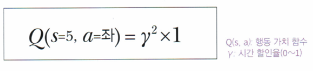

In [ ]:
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic_rl/강화15.png', width=600)
# 에이전트가 5에 위치해있다.
# 만약 에이전트가 '좌' 방향으로 행동을 선택했다면, 4번 상태로 이동하게 되고, 골인 지점(8)으로부터 멀어진다.
# 여기서 다시 골인 지점을 최단 거리로 간다면
# 5 -> 4 -> 5 -> 8 이렇게 불필요한2번의 스텝이 추가된다.
# 즉, 이런 행동에 대해서 골인지점까지 가기 위해 단계가 추가되고 => 시간이 추가되고 => 보상이 줄어든다.
# 시간 할인율^2(추가된 스텝수) * 1(보상)

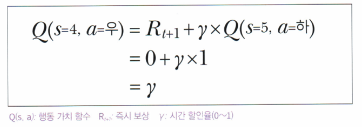

In [ ]:
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic_rl/강화16.png', width=600)
# 4번 상태 위치에서 가치를 계산한 식(참고)
# 4번 위치의 즉시 보상은 없기 때문에 R_(t+1)은 0이다.

# 상태가치함수

- 특정 상태의 가치를 계산
- 기호는 V

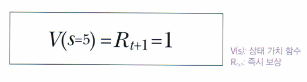

In [ ]:
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic_rl/강화17.png', width=600)

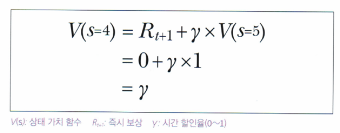

In [ ]:
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic_rl/강화18.png', width=600)
# 에이전트가 4번 위치에 있다.
# 상태가치는 골인 방향으로 이동한다는 전제 有
# 상태 가치는 4번 위치의 상태 가치 + 시간 할인율 * 다음 칸(5번)의 상태 가치

# 벨만방정식 (Bellman Equation)

- 행동 가치 함수, 상태 가치 함수를 수학으로 표현
- 현재 상태와 다음 상태의 관계를 나타내는 방정식

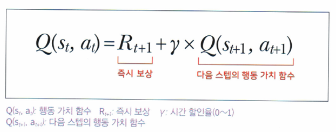

In [ ]:
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic_rl/강화19.png', width=600)
# 행동 가치 함수 => Q 함수
# 현재 행동 가치 함수 = 즉시보상(t+1) + 시간 할인율 * (다음 스텝(t+!)의 행동 가치 함수)

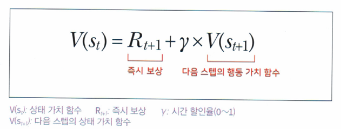

In [ ]:
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic_rl/강화20.png', width=600)
# 상태 가치 함수 => V 함수
# 현재 상태 가치 함수 = 즉시보상(t+1) + 시간 할인율 * (다음 스텝(t+!)의 상태 가치 함수)

# 마르코프 결정 과정 (Markov Decision Process:MDP)

- 벨만 방정식이 성립하기 위해서는, 환경이 MDP를 따라야 한다.
- 다음 상태가 현재 상태에서 선택한 행동에 따라 확정되는 시스템
- 벨만 방정식으로 행동 가치 함수를 학습하는 방법
  - Sarsa, Q 학습 => NN으로 대체하면 DQN
    - feature 및 여러 상황들이 많으면 DQN으로 대체하여 처리
- 벨만 방정식으로 상태 가치 함수를 학습하는 방법
  - A2C, Dueling Network

# 코드 구현

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

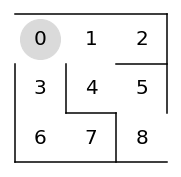

In [ ]:
# 게임판 그리기
fig = plt.figure( figsize=(3,3) )

# 외곽 벽그리기
plt.plot( [0,3], [3,3], color='k') # 맨위 수평선
plt.plot( [0,3], [0,0], color='k') # 맨아래 수평선
plt.plot( [0,0], [0,2], color='k') # 왼쪽 수직선, 입구 표시
plt.plot( [3,3], [1,3], color='k') # 오른쪽 수직선, 출구 표시

# 내부 벽 그리기
plt.plot( [1,1], [1,2], color='k') 
plt.plot( [2,3], [2,2], color='k')
plt.plot( [1,2], [1,1], color='k')
plt.plot( [2,2], [0,1], color='k')

# 각 포인트에 숫자 표현
for n in range( 3 ):
  for m in range( 3 ):
      plt.text( n+0.5, 3-m-0.5, str(n+m*3), size=20, ha='center', va='center' )

# 에이전트 그리기
mouse = plt.plot( 0.5, 2.5, marker='o', color='#dadada', markersize=40 )

# 눈금 정리 -> 제거
plt.tick_params( 
                #axis='both', 
                #which='both', 
                 bottom=False, left=False, #right=False, top=False, 
                 labelbottom=False, labelleft=False
                )


plt.box(False)
plt.show()

In [ ]:
theta_0 = np.array( [
  # [ 상, 우, 하, 좌 ]
  [ np.nan, 1, 1, np.nan ], # 0
  [ np.nan, 1, 1, 1 ], # 1
  [ np.nan, np.nan, np.nan, 1 ], # 2
  [ 1, np.nan, 1, np.nan ], # 3
  [ 1, 1, np.nan, np.nan ], # 4
  [ np.nan, np.nan, 1, 1 ], # 5
  [ 1, 1, np.nan, np.nan ], # 6
  [ np.nan, np.nan, np.nan, 1 ], # 7
] )

In [ ]:
def mySoftmax( theta ):
  output = np.zeros_like( theta )
  theta  = np.exp(theta) 
  for i in range(theta_0.shape[0]):
    output[i]   = theta[i] / np.nansum(theta[i])    
  return np.nan_to_num( output )

pi_0 = mySoftmax( theta_0 )
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.33333333],
       [0.        , 0.        , 0.        , 1.        ],
       [0.5       , 0.        , 0.5       , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [ ]:
def getNextState( curState, nextAction ):
  if   nextAction == 0: # 상
    return curState - 3
  elif nextAction == 1: # 우
    return curState + 1
  elif nextAction == 2: # 하
    return curState + 3
  elif nextAction == 3: # 좌
    return curState - 1

In [ ]:
# 시뮬레이션을 위한 환경변수, 상수 정의
AGENT_FIRST_STATE = 0
# 에이전트 AGENT_LAST_STATE로 상태값이 세팅되면 에피소드 종료 -> 판단 기준
AGENT_LAST_STATE  = 8

## 새로 구성한 내용

In [ ]:
# Q함수 -> 배열 생성
# 행동 가치 함수 => Q함수
# 랜덤한 값(theta_0와 동일한 shape) * 각 상태에서 행동할 수 있는 조건(theta_0) * 임계값(0.01)
a, b = theta_0.shape
Q    = np.random.rand( a, b ) * theta_0 * 0.01
Q

array([[           nan, 2.23439851e-03, 1.57163082e-06,            nan],
       [           nan, 6.91810930e-04, 1.87072345e-04, 3.11797957e-03],
       [           nan,            nan,            nan, 3.81039342e-03],
       [4.82239442e-03,            nan, 9.36818979e-03,            nan],
       [7.69449678e-03, 8.95220965e-03,            nan,            nan],
       [           nan,            nan, 3.84032408e-03, 8.48128798e-03],
       [6.55273620e-04, 9.98452515e-03,            nan,            nan],
       [           nan,            nan,            nan, 2.88200716e-03]])

In [ ]:
# 앱실롭을 개입시켜서 특정 확률로는 np.random.choice() 로 처리
# 다른 확률로는 확률이 가장 큰값 기준으로 선택(동일 확률이면 앞에서부터 나올것이다->확인필요) argmax
# 행동 선택
# state   : 현재 에이전트의 상태
# policy  : 정책
# epsilon : 행동 선택의 방법을 선정하는 비율을 산정하는 확률값
# Q       : 행동 가치 함수 (행동 가치 파라미터)
def getAction( state, policy, epsilon, Q ):
  if np.random.rand() < epsilon: # epsilon이 0.1이면 10%이하는 np.random.choice()로 선택
    return np.random.choice( [0, 1, 2, 3], p=policy[state] )
  else:
    # 행동 가치 함수로 행동을 선택하겠다
    # nan값을 제외하고, 가장 큰 최대값을 얻는다
    # Q함수는 행동을 수행하면 갱신된다
    # Q함수에서 현재 상태에 적용된 값들중 nan을 제외한 최대값을 다음 행동을 결정
    # print( type(Q))
    return np.nanargmax( Q[state] )


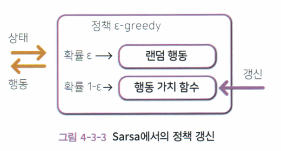

In [ ]:
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic_rl/강화21.png', width=400)
# 행동 가치 함수가 갱신의 대상이다

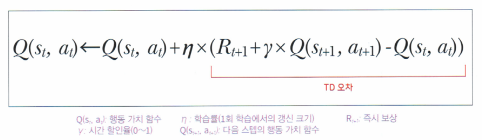

In [ ]:
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic_rl/강화22.png', width=800)
# 행동 가치 함수 갱신 식 = 행동 가치 함수 + 학습률 * TD 오차
# 학습률(지정하기 나름 => 반영율)
# TD 오차
# Temporal Difference : 행동전  평가값과 행동 후 평가값의 차이
# 행동후 평가값 = (다음번 즉시 보상) + 시간 할인율 * 다음 스텝의 행동 가치 값
# td오차 = (다음번 즉시 보상) + 시간 할인율 * 다음 스텝의 행동 가치 값 - 현재 행동 가치
# td오차값이 0에 가까울수록 최적화가 된다
# 보상을 보다 정확하게 예측할수 있다 -> 가장 큰 보상을 얻는 방향으로 행동을 선택할 수 있게 된다
# 어떤 일련의 행동들은 전부 최대 보상을 얻기 위한 전략으로 이해

## 중간정리

- 가치 반복법
  - 재료
    - nan값이 들어간 세타 배열
    - 세타 배열을 softmax로 처리한 정책 배열(확률)
    - Q 함수(?)
      - 가치를 계산!, 가치를 갱신 하는 담당
      - 방법
        - sarsa
        - q learning
  - Q 함수 갱신주기
    - 행동 1회 완료후 -> 계산 -> Q함수 갱신한다
  - 행동결정
    - 앱실론 값 이하면 랜덤으로 행동(갈수 있는곳을 기준)
    - 앱실론 값 이상이면 -> Q함수에서 최대값 기준으로 행동을 선택

In [ ]:
# 행동을 한 번 수행 할때마가 행동 가치 함수(Q 함수)를 갱신한다
# 수렴은 느림, 국소적인 해답에 갇히지 않는다(유연하다)
# 앱실론 그리드 알고리즘을 사용하고 있다 
# => 살사 알고리즘은 재료값(파라미터로 a가 들어오는데 이 부분에 서 앱실론을 사용하므로) 앱실론이 가진 무작위성을 내포하고 있다
# s      : 현재 상태 
# a      : 현재 상태에 행동
# r      : 보상 
# s_next : 다음 상태
# a_next : 다음 상태 행동
# Q : Q 함수, 행동가치함수(갱신의 대상이 되는)
def sarsa( s, a, r, s_next, a_next, Q ):
  eta   = 0.1                     # 학습률을 고정하겠다 => 10%만 TD오차를 반영하겠다
  gamma = 0.9                     # 시간 할인율 -> 90%를 적용하겠다 -> 설정이고, 고정, 필요하면 변경가능 
  if AGENT_LAST_STATE == s_next : # 골인 지점
    # 골인 지점은 엔딩을 의미하고, 다음 행동 가치 값은 존재하지 않는다
    # gamma * 0 은 무의미하므로(값으로) 좀 더 단순하게 표현 가능하다
    # Q[ s, a ] = Q[ s, a ] + eta * ( r + gamma*0 )
    Q[ s, a ] = Q[ s, a ] + eta * ( r - Q[ s, a ] )
  else : # 골인 지점이 아닌  포인트
    Q[ s, a ] = Q[ s, a ] + eta * ( r + gamma*Q[ s_next, a_next ] -  Q[ s, a ] )
  return Q

In [ ]:
# 행동을 한 번 수행 할 때마다 행동 가치 함수(Q 함수)를 갱신한다
# 수령은 빠름, 국소적인 해답에 갇힐 수 있다(쉽다)
# 해당 다음 상태의 행동 가치 함수 중에서 최대값을 선택
def q_learning( s, a, r, s_next, a_next, Q ):
  eta   = 0.1
  gamma = 0.9
  if AGENT_LAST_STATE == s_next :
    Q[ s, a ] = Q[ s, a ] + eta * ( r - Q[ s, a ] )
  else :
    # 어떤 행동이든 상관없이 최대값 기준으로 조정 -> 국소적일 수 있다
    Q[ s, a ] = Q[ s, a ] + eta * ( r + gamma* np.nanmax(Q[ s_next, : ]) -  Q[ s, a ] )
  return Q

In [ ]:
# 2개 함수를 인터페이스로 구성한다면 => 클로저
def Q_Func_Update( type, s, a, r, s_next, a_next, Q ):
  def sarsa( s, a, r, s_next, a_next, Q ):
    # ...
    return Q
  def q_learning( s, a, r, s_next, a_next, Q ):
    # ...
    return Q
  if type == 'q':
    return q_learning( s, a, r, s_next, a_next, Q )
  else:
    return sarsa( s, a, r, s_next, a_next, Q )

# 1 에피소드 구성

In [ ]:
# 시뮬레이션 진행 시 epsilon을 조정-> 점점 값을 감소시킬 것이다
# Q       : 행동 가치 함수
# epsilon : 행동을 구할때 랜덤하게 얻는 비율값
# pi      : 정책
def play( Q,  epsilon, pi ):
  # 초기상태
  s       = AGENT_FIRST_STATE
  # 초기 행동
  a_next  = getAction( s, pi, epsilon, Q) 
  # 상태 및 행동 이력 저장
  s_a_his = [ [s, np.nan] ]

  # 반복 수행 -> 골인 지점까지 에이전트가 도착할 때까지
  while True:
    # 다음 행동을 얻으면 그에 따른 상태가 변경된다
    a = a_next
    s_next = getNextState( s, a ) # 현재 상태에서 다음행동을 취하면 다음 상태를 얻을 수 있다
    # 이력 갱신 진행
    s_a_his[-1][-1] = a
    # 새로운 이력이 추가
    s_a_his.append( [ s_next, np.nan ] ) # [다음 상태, 다음 다음 행동]
    # 종료 판정 -> 리워드 계산(골인 지점에 도착하면 즉시 보상으로 1을 받는다)
    if s_next == AGENT_LAST_STATE:
      r      = 1      # 즉시 보상
      a_next = np.nan # 다음 행동 없다, 골인 지점에는 그대로 종료
    else:
      r      = 0      # 즉시 보상
      a_next = getAction( s_next, pi, epsilon, Q)  # 다음 행동 획득
    # 행동 가치 함수의 갱신 -> 행동이 수행되면 갱신 진행
    # 살사로 갱신
    # Q = sarsa( s, a, r, s_next, a_next, Q )
    # Q러닝으로 갱신
    Q = q_learning( s, a, r, s_next, a_next, Q )
    # 에피소드 종료
    if s_next == AGENT_LAST_STATE:
      break
    else:
      # 현재 상태를 다음 상태로 변경 => 이동했다
      s = s_next

  # 1 에피소드의 에이전트의 이동 내력(로그), 행동가치함수(Q 함수)
  return s_a_his, Q

# 시뮬레이션 진행

In [ ]:
epsilon = 0.5 # 50% 확률로 랜덤으로 가고, 나머지는 행동 가치 함수로 정해진다
# epsilon -> 계속해서 값을 50%씩 줄이겠다
# 에피소드 반복
for episode in range(10):  
  # 앱실론 그리드 값 조정
  epsilon /= 2
  # 에피소드 수행
  # pi => theta_0를 softmax로 통과시킨 정책
  s_a_his, Q = play( Q,  epsilon, pi_0 )
  # 로그 출력
  # print(f'- [sarsa] 에피소드:{episode+1:2} 에이전트의 이동수:{len(s_a_his):3} 엡실론:{epsilon}')
  print(f'- [Q-Ler] 에피소드:{episode+1:2} 에이전트의 이동수:{len(s_a_his):3} 엡실론:{epsilon}')

- [Q-Ler] 에피소드: 1 에이전트의 이동수:179 엡실론:0.25
- [Q-Ler] 에피소드: 2 에이전트의 이동수:451 엡실론:0.125
- [Q-Ler] 에피소드: 3 에이전트의 이동수: 13 엡실론:0.0625
- [Q-Ler] 에피소드: 4 에이전트의 이동수:  5 엡실론:0.03125
- [Q-Ler] 에피소드: 5 에이전트의 이동수:  5 엡실론:0.015625
- [Q-Ler] 에피소드: 6 에이전트의 이동수:  5 엡실론:0.0078125
- [Q-Ler] 에피소드: 7 에이전트의 이동수:  5 엡실론:0.00390625
- [Q-Ler] 에피소드: 8 에이전트의 이동수:  5 엡실론:0.001953125
- [Q-Ler] 에피소드: 9 에이전트의 이동수:  5 엡실론:0.0009765625
- [Q-Ler] 에피소드:10 에이전트의 이동수:  5 엡실론:0.00048828125


In [ ]:
'''
- [sarsa] 에피소드: 1 에이전트의 이동수: 39 엡실론:0.25
- [sarsa] 에피소드: 2 에이전트의 이동수: 19 엡실론:0.125
- [sarsa] 에피소드: 3 에이전트의 이동수:  7 엡실론:0.0625
- [sarsa] 에피소드: 4 에이전트의 이동수:  5 엡실론:0.03125
- [sarsa] 에피소드: 5 에이전트의 이동수:  5 엡실론:0.015625
- [sarsa] 에피소드: 6 에이전트의 이동수:  5 엡실론:0.0078125
- [sarsa] 에피소드: 7 에이전트의 이동수:  5 엡실론:0.00390625
- [sarsa] 에피소드: 8 에이전트의 이동수:  5 엡실론:0.001953125
- [sarsa] 에피소드: 9 에이전트의 이동수:  5 엡실론:0.0009765625
- [sarsa] 에피소드:10 에이전트의 이동수:  5 엡실론:0.00048828125

- [Q-Ler] 에피소드: 1 에이전트의 이동수:179 엡실론:0.25
- [Q-Ler] 에피소드: 2 에이전트의 이동수:451 엡실론:0.125
- [Q-Ler] 에피소드: 3 에이전트의 이동수: 13 엡실론:0.0625
- [Q-Ler] 에피소드: 4 에이전트의 이동수:  5 엡실론:0.03125
- [Q-Ler] 에피소드: 5 에이전트의 이동수:  5 엡실론:0.015625
- [Q-Ler] 에피소드: 6 에이전트의 이동수:  5 엡실론:0.0078125
- [Q-Ler] 에피소드: 7 에이전트의 이동수:  5 엡실론:0.00390625
- [Q-Ler] 에피소드: 8 에이전트의 이동수:  5 엡실론:0.001953125
- [Q-Ler] 에피소드: 9 에이전트의 이동수:  5 엡실론:0.0009765625
- [Q-Ler] 에피소드:10 에이전트의 이동수:  5 엡실론:0.00048828125
'''

'\n- [sarsa] 에피소드: 1 에이전트의 이동수: 39 엡실론:0.25\n- [sarsa] 에피소드: 2 에이전트의 이동수: 19 엡실론:0.125\n- [sarsa] 에피소드: 3 에이전트의 이동수:  7 엡실론:0.0625\n- [sarsa] 에피소드: 4 에이전트의 이동수:  5 엡실론:0.03125\n- [sarsa] 에피소드: 5 에이전트의 이동수:  5 엡실론:0.015625\n- [sarsa] 에피소드: 6 에이전트의 이동수:  5 엡실론:0.0078125\n- [sarsa] 에피소드: 7 에이전트의 이동수:  5 엡실론:0.00390625\n- [sarsa] 에피소드: 8 에이전트의 이동수:  5 엡실론:0.001953125\n- [sarsa] 에피소드: 9 에이전트의 이동수:  5 엡실론:0.0009765625\n- [sarsa] 에피소드:10 에이전트의 이동수:  5 엡실론:0.00048828125\n'

# 학습된 내용을 기반으로 그리기

In [ ]:
# 애니메이션 처리
from matplotlib import animation
# 코랩에 게임판이 html로 생성되는데, 삽입
from IPython.display import HTML

In [ ]:
# frame : 0~ len(a_s_his)-1까지 인자로 넣어서 호출
def simulatorPlay( frame ):
  # 각 프레임에서 미로 게임상의 에이전트의 상태값을 획득
  state = s_a_his[ frame ][0]
  # 에이전트를 새로운 위치에 그린다
  mouse[0].set_data( (state%3)+0.5 , 3 - (state//3) - 0.5 )
  pass

# 애니메이션 정의
ani = animation.FuncAnimation( fig, simulatorPlay, frames=len(s_a_his), interval=200, repeat=False )

# html을 코랩에 임베딩하여 재생
HTML( ani.to_jshtml() )